# <span style=color:purple><ins>Lliurament tasca 5: Exploració de les dades</ins></span>  

# <span  style=color:gray><ins>Tasca5_exercici1</ins></span>

<b><h4>Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants<h4><b>.

In [9]:
import pandas as pd
import numpy as np
import os
import time
import datetime 
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\Anton SL\\onedrive\\documentos\\it_academics\\data_science\\Jupyter_sprint_3_tasca5'

In [3]:
#convertir a time para ello primero pasar a objeto (str o objeto) 

In [4]:
#df = pd.read_csv('DelayedFlights.csv', sep=',', dtype = {'DepTime' : 'str' ,'CRSDepTime' : 'str' ,'ArrTime' : 'str' , 'CRSArrTime' : 'str' ,  'ActualElapsedTime'  : 'str' , ' CRSElapsedTime' : 'str' , 'AirTime' : 'str' , 'ArrDelay' : 'str' , 'DepDelay' : 'str'})
df = pd.read_csv('DelayedFlights.csv', sep=',')

In [5]:
df2 = df[["Year","Month", "DayofMonth", "DayOfWeek","DepTime", "CRSDepTime","ArrTime", "CRSArrTime","UniqueCarrier","ActualElapsedTime","CRSElapsedTime","AirTime","ArrDelay","DepDelay","Origin","Dest","Distance","TaxiIn","TaxiOut","Cancelled","CancellationCode","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]

# <span  style=color:gray><ins>Tasca5_exercici2</ins></span>

Fes un informe complet del data set:

1. Resumeix estadísticament les columnes d’interès
2. Troba quantes dades faltants hi ha per columna
3. Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
4. Taula de les aerolínies amb més endarreriments acumulats
5. Quins són els vols més llargs? I els més endarrerits?


1. Resumeix estadísticament les columnes d’interès

In [6]:
df2.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,...,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.928371e+06,1.936560e+06,...,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,1.333059e+02,1.343027e+02,...,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,7.206007e+01,7.134144e+01,...,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,-2.500000e+01,...,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,8.000000e+01,8.200000e+01,...,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.160000e+02,1.160000e+02,...,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,1.650000e+02,1.650000e+02,...,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,1.114000e+03,6.600000e+02,...,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [7]:
#Count 			número de observacions
#Mean			Mitjana valors columna
#Std			desviació
#Min			valor mes petit del atribut
#25%			Valor >25% de la sèrie 
#50%			Valor >50% de la sèrie
#75%			Valor >75% de la sèrie
#Max			Valor mes gran del atribut


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   ActualElapsedTime  float64
 10  CRSElapsedTime     float64
 11  AirTime            float64
 12  ArrDelay           float64
 13  DepDelay           float64
 14  Origin             object 
 15  Dest               object 
 16  Distance           int64  
 17  TaxiIn             float64
 18  TaxiOut            float64
 19  Cancelled          int64  
 20  CancellationCode   object 
 21  CarrierDelay       float64
 22  WeatherDelay       float64
 23  NASDelay           float64
 24  SecurityDelay      float64
 25  LateAircraftDelay 

2. Resumeix estadísticament les columnes d’interès(Data transformation)

In [9]:
print('Dades Afectades: ',df2.isnull().sum().sum(),' campos' )
#Veien num files afectades
print('Row count is:',len(df2.index))

Dades Afectades:  3486384  campos
Row count is: 1936758


In [10]:
#los NaN vamos a hacer la media, pero ojo que los vuelos cancelados tienen 0 en algunos valores.
df2 = df2.fillna(df2.median())
#df2 = df2.fillna(0)

In [11]:
### mirem si no hi han not null
#(df2.notnull().sum()) *100/len(df2)
(df2.isnull().sum()) *100/len(df2)

Year                 0.0
Month                0.0
DayofMonth           0.0
DayOfWeek            0.0
DepTime              0.0
CRSDepTime           0.0
ArrTime              0.0
CRSArrTime           0.0
UniqueCarrier        0.0
ActualElapsedTime    0.0
CRSElapsedTime       0.0
AirTime              0.0
ArrDelay             0.0
DepDelay             0.0
Origin               0.0
Dest                 0.0
Distance             0.0
TaxiIn               0.0
TaxiOut              0.0
Cancelled            0.0
CancellationCode     0.0
CarrierDelay         0.0
WeatherDelay         0.0
NASDelay             0.0
SecurityDelay        0.0
LateAircraftDelay    0.0
dtype: float64

In [12]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,...,810,4.0,8.0,0,N,2.0,0.0,2.0,0.0,8.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,...,810,5.0,10.0,0,N,2.0,0.0,2.0,0.0,8.0
2,2008,1,3,4,628.0,620,804.0,750,WN,96.0,...,515,3.0,17.0,0,N,2.0,0.0,2.0,0.0,8.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,515,3.0,10.0,0,N,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,101.0,...,688,4.0,10.0,0,N,2.0,0.0,2.0,0.0,8.0


In [13]:
#ajuste de datos a horas y minutos, para empezar con los calculos.
df2["DepTime"] = round(df2["DepTime"]/100,2)
df2["CRSDepTime"] = round(df2["CRSDepTime"]/100,2)
df2["ArrTime"] = round(df2["ArrTime"]/100,2)
df2["CRSArrTime"] = round(df2["CRSArrTime"]/100,2)
df2["ActualElapsedTime"] = round(df2["ActualElapsedTime"]/60,2)
df2["CRSElapsedTime"] = round(df2["CRSElapsedTime"]/60,2)
df2["AirTime"] = round(df2["AirTime"]/60,2)
df2["ArrDelay"] = round(df2["ArrDelay"]/60,2) 
df2["DepDelay"] = round(df2["DepDelay"]/60,2)
df2["TaxiIn"] = round(df2["TaxiIn"]/60,2)
df2["TaxiOut"] = round(df2["TaxiOut"]/60,2)
df2["CarrierDelay"] = round(df2["CarrierDelay"]/60,2)
df2["WeatherDelay"] = round(df2["WeatherDelay"]/60,2)
df2["NASDelay"] = round(df2["NASDelay"]/60,2)
df2["SecurityDelay"] = round(df2["SecurityDelay"]/60,2)
df2["LateAircraftDelay"] = round(df2["LateAircraftDelay"]/60,2)

In [14]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,20.03,19.55,22.11,22.25,WN,2.13,...,810,0.07,0.13,0,N,0.03,0.0,0.03,0.0,0.13
1,2008,1,3,4,7.54,7.35,10.02,10.00,WN,2.13,...,810,0.08,0.17,0,N,0.03,0.0,0.03,0.0,0.13
2,2008,1,3,4,6.28,6.20,8.04,7.50,WN,1.60,...,515,0.05,0.28,0,N,0.03,0.0,0.03,0.0,0.13
3,2008,1,3,4,18.29,17.55,19.59,19.25,WN,1.50,...,515,0.05,0.17,0,N,0.03,0.0,0.00,0.0,0.53
4,2008,1,3,4,19.40,19.15,21.21,21.10,WN,1.68,...,688,0.07,0.17,0,N,0.03,0.0,0.03,0.0,0.13


In [15]:
#Crear una columan date con un formato datetime
#introducir le valor a la nueva columan
# cinvertir la columnas a un tipo de dato datetime

df2['Regular_Date'] =str(datetime.datetime.now())
df2['Regular_Date'] = pd.to_datetime(df2.Regular_Date)
df2['Regular_Date'] = df2['DayofMonth'].astype(str) + "/" + df2['Month'].astype(str) + '/' + df2['Year'].astype(str) 


3. Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

* crear columna velocitat mitajana vol.
* Quins vol arribat puntiual (si o no). (Boolean)
* Quin dia de la setmana arriben hi han mes retrads.
* Quins aeroports acumulan mes retrads

crear columna velocitat mitajana vol.

In [16]:
# la veolciatat mitjana  km/h.(airtime correspon al temps que hi ha estat volant.no es tenen en compte altre varibles)
df2["AvaregeSpeed Km/h"] = round(df2["Distance"]/df2["AirTime"],2)
#Veliciad media de los aviones en este dataframe 
print("la mediana es " , round(df2["AvaregeSpeed Km/h"].median(),2), 'Km/h')

la mediana es  404.0 Km/h


Quins vol arribat puntiual (si o no). (Boolean)
Considerem com retrads aquell vol que el temps d'arribada serà superior a 15 min (15/60)= 0,25

In [17]:
df2['Ontime'] = np.where ((df2["ArrDelay"] >= 0.25)| (df2["ArrDelay"] <= -0.25) ,'Si','No')

Quin dia de la setmana acumula mes retrads

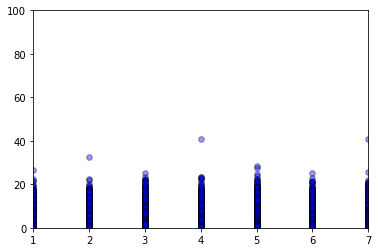

In [18]:
#create data
y = df2['ArrDelay']
x = df2['DayOfWeek']

colors = 'Blue'
area = np.pi*10

plt.axis([1, 7, 0, 100])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.show()


In [19]:
df3 = df2[['ArrDelay']]

In [20]:
df3['myweekday'] = df2['DayOfWeek'].map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'thursday', 5:'Friday', 6:'Saturday',7:'Sunday'})

<ipython-input-20-3eb2108170b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['myweekday'] = df2['DayOfWeek'].map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'thursday', 5:'Friday', 6:'Saturday',7:'Sunday'})


In [21]:
df3.groupby('myweekday').mean().sort_values(by='ArrDelay', ascending=[False]).round(2)

,ArrDelay
myweekday,
Sunday,0.74
Tuesday,0.73
Friday,0.72
Monday,0.69
thursday,0.68
Wednesday,0.67
Saturday,0.66


Quins aeroports acumulan mes retrads

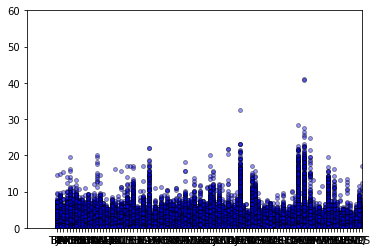

In [22]:
#create data
y = df2['ArrDelay']
x = df2['Dest']

colors = 'Blue'
area = np.pi*5

plt.axis([-10, 100, 0, 60])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.show()


In [23]:
df4 = df2[['Origin','DepDelay','Dest','ArrDelay','Distance']]

In [24]:
df4.groupby('Dest').mean().sort_values(by='ArrDelay', ascending=[False]).round(2)

,DepDelay,ArrDelay,Distance
Dest,,,
MQT,1.29,1.29,227.16
SPI,1.17,1.20,263.41
INL,1.12,1.11,254.00
MCN,1.13,1.09,79.00
ALO,1.08,1.09,166.00
...,...,...,...
BLI,0.42,0.38,757.00
IYK,0.38,0.35,123.00
BJI,0.55,0.34,199.00


# <span  style=color:gray><ins>Tasca5_exercici3</ins></span>

Exporta el data set net i amb les noves columnes a Excel.

df2.to_excel('C:\\Users\Anton SL\\OneDrive\\Documentos\\IT_Academics\\Data_Science\\Jupyter_sprint_3_tasca5\Jupyter_sprint_3_tasca5.xlsx')

No exportamos a excel porque excel tiene limitaciones de lineas.

In [26]:
df2.to_csv('C:\\Users\Anton SL\\OneDrive\\Documentos\\IT_Academics\\Data_Science\\Jupyter_sprint_3_tasca5\Jupyter_sprint_3_tasca5.csv')

# <span  style=color:red><ins>Tasca6_exercici4</ins></span>

### <span style=color:blue>Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.</span>

In [1]:
from IPython.display import Image

In [20]:

imgdir ='C:\\Users\\Anton SL\\OneDrive\\Documentos\\IT_Academics\\Data_Science\\Jupyter_sprint_4_tasca6\\'
os.chdir(imgdir)
print (imgdir)


C:\Users\Anton SL\OneDrive\Documentos\IT_Academics\Data_Science\Jupyter_sprint_4_tasca6\


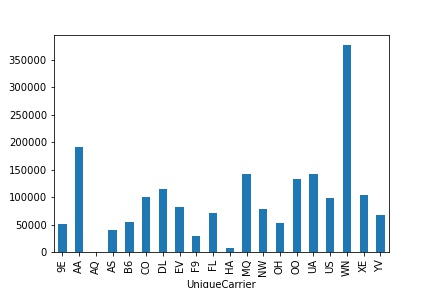

In [22]:
Image(imgdir + 'Fig1.jpg')

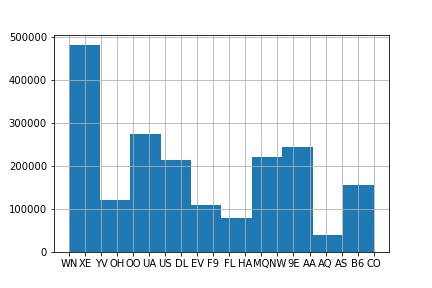

In [23]:
Image(imgdir + 'Fig2.jpg')

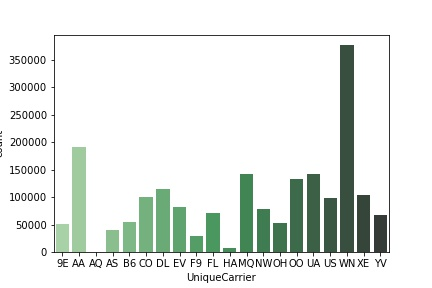

In [24]:
Image(imgdir + 'Fig3.jpg')

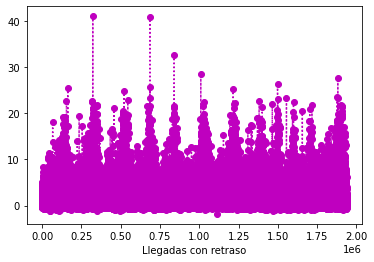

In [26]:
Image(imgdir + 'Fig4.png')

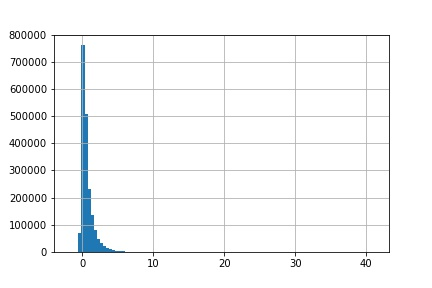

In [27]:
Image(imgdir + 'Fig5.jpg')

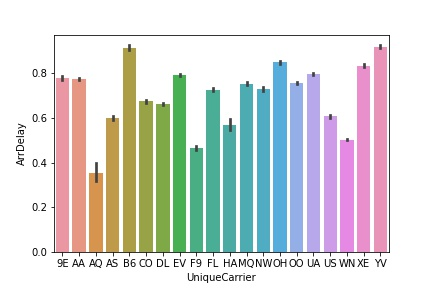

In [28]:
Image(imgdir + 'Fig6A.jpg')

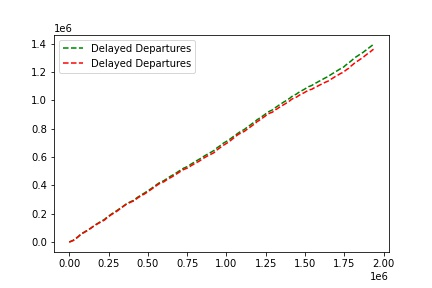

In [29]:
Image(imgdir + 'Fig7.jpg')

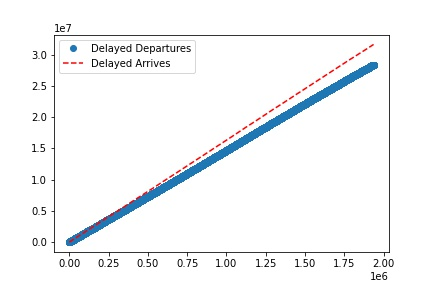

In [30]:
Image(imgdir + 'Fig8.jpg')

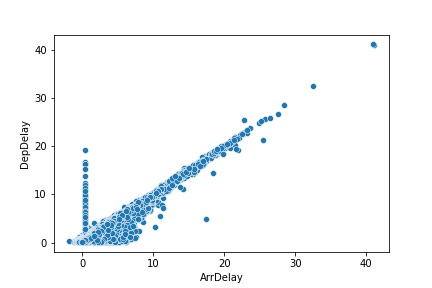

In [31]:
Image(imgdir + 'Fig9.jpg')

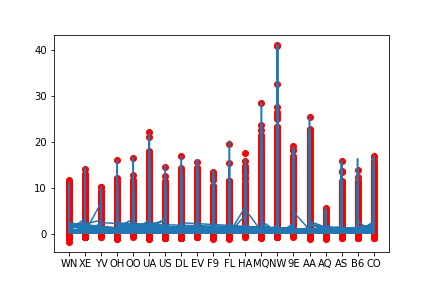

In [32]:
Image(imgdir + 'Fig10.jpg')

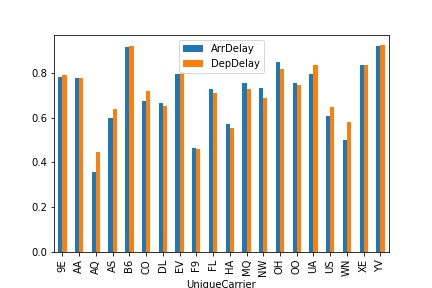

In [33]:
Image(imgdir + 'Fig11.jpg')

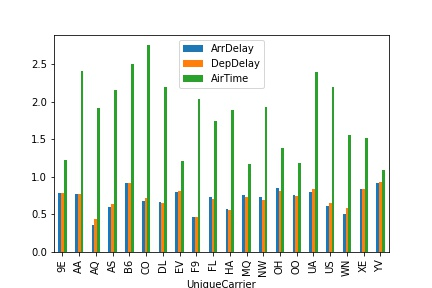

In [34]:
Image(imgdir + 'Fig12.jpg')

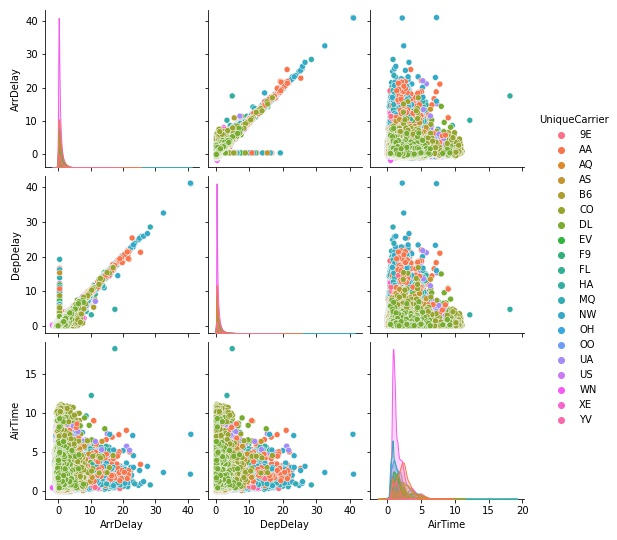

In [35]:
Image(imgdir + 'Fig13.jpg')